In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [4]:
df = pd.read_csv("../data/final_tables/composite/composite.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
# Select the country for which you want to check holidays
df[:20]

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,Normalized Forecast,temperature,humidity,cloudcover,windspeed,year,month,day_of_week,day,hour,region_id
0,2016-01-01 00:00:00,1922.0,1910.0,1266.0,banc,-0.139874,-0.162466,0.7,72,0,11.4,2016,1,4,1,0,0
1,2016-01-01 01:00:00,1849.0,1790.0,1271.0,banc,-0.277310,-0.388389,0.6,68,3,12.2,2016,1,4,1,1,0
2,2016-01-01 02:00:00,1795.0,1720.0,1198.0,banc,-0.378975,-0.520177,0.5,65,1,9.1,2016,1,4,1,2,0
3,2016-01-01 03:00:00,1757.0,1698.0,1174.0,banc,-0.450517,-0.561596,0.4,62,8,10.6,2016,1,4,1,3,0
4,2016-01-01 04:00:00,1744.0,1678.0,1146.0,banc,-0.474992,-0.599250,0.3,61,16,11.4,2016,1,4,1,4,0
5,2016-01-01 05:00:00,1767.0,1701.0,1176.0,banc,-0.431691,-0.555948,0.1,60,19,10.1,2016,1,4,1,5,0
6,2016-01-01 06:00:00,1800.0,1757.0,1174.0,banc,-0.369562,-0.450517,-0.1,60,31,9.6,2016,1,4,1,6,0
7,2016-01-01 07:00:00,1865.0,1840.0,1309.0,banc,-0.247187,-0.294254,-0.3,61,44,10.1,2016,1,4,1,7,0
8,2016-01-01 08:00:00,1888.0,1888.0,1332.0,banc,-0.203885,-0.203885,-0.3,64,39,9.7,2016,1,4,1,8,0
9,2016-01-01 09:00:00,1911.0,1927.0,1343.0,banc,-0.160583,-0.130460,1.8,61,35,9.3,2016,1,4,1,9,0


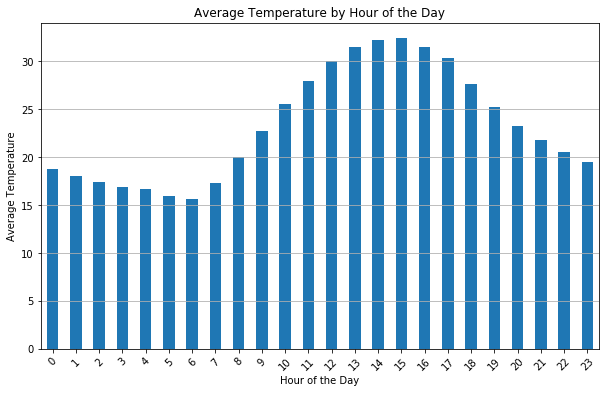

In [18]:
average_temperature = df[(df["Region"]=='banc') & (df["month"]==9)].groupby('hour')['temperature'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_temperature.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Hour of the Day')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

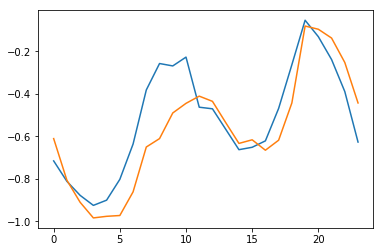

In [18]:
start=24*50
banc_2023 = pd.read_csv("../data/final_tables/banc_2023/banc_2023.csv")
banc_2023["timestamp"] = pd.to_datetime(banc_2023["timestamp"])
# Select the country for which you want to check holidays
plt.plot(banc_2023['hour'][start:start+24],banc_2023['Normalized Demand'][start:start+24])
plt.plot(df['hour'][start:start+24],df['Normalized Demand'][start:start+24])

In [34]:
df = pd.read_csv("../data/final_tables/banc2023andcomposite/banc2023andcomposite.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
# Select the country for which you want to check holidays
df_train = df[(df["Region"]=='banc') & (df["2023"]==0)]
df_test = df[df["2023"]==1]

In [37]:
df_train

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,Normalized Forecast,temperature,humidity,cloudcover,windspeed,year,month,day_of_week,day,hour,region_id,2023
0,2016-01-01 00:00:00,1922.0,1910.0,1266.0,banc,-0.139874,-0.162466,0.7,72,0,11.4,2016,1,4,1,0,0.0,0
1,2016-01-01 01:00:00,1849.0,1790.0,1271.0,banc,-0.277310,-0.388389,0.6,68,3,12.2,2016,1,4,1,1,0.0,0
2,2016-01-01 02:00:00,1795.0,1720.0,1198.0,banc,-0.378975,-0.520177,0.5,65,1,9.1,2016,1,4,1,2,0.0,0
3,2016-01-01 03:00:00,1757.0,1698.0,1174.0,banc,-0.450517,-0.561596,0.4,62,8,10.6,2016,1,4,1,3,0.0,0
4,2016-01-01 04:00:00,1744.0,1678.0,1146.0,banc,-0.474992,-0.599250,0.3,61,16,11.4,2016,1,4,1,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61364,2022-12-31 20:00:00,2025.0,2021.0,1539.0,banc,0.054043,0.046513,9.8,78,100,45.4,2022,12,5,31,20,0.0,0
61365,2022-12-31 21:00:00,1821.0,1941.0,1503.0,banc,-0.330025,-0.104103,9.6,77,90,28.2,2022,12,5,31,21,0.0,0
61366,2022-12-31 22:00:00,1686.0,1862.0,1488.0,banc,-0.584188,-0.252835,9.0,80,77,23.5,2022,12,5,31,22,0.0,0
61367,2022-12-31 23:00:00,1625.0,1784.0,1570.0,banc,-0.699033,-0.399685,8.9,84,42,15.0,2022,12,5,31,23,0.0,0


In [40]:
df_test

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,Normalized Forecast,temperature,humidity,cloudcover,windspeed,year,month,day_of_week,day,hour,region_id,2023
184107,2023-01-01 00:00:00,1594.0,1717.0,NaN,banc_2023,-0.747377,-0.515713,9.4,84,37,17.7,2023,1,6,1,0,NaN,1
184108,2023-01-01 01:00:00,1565.0,1537.0,NaN,banc_2023,-0.801997,-0.854733,9.2,75,12,20.5,2023,1,6,1,1,NaN,1
184109,2023-01-01 02:00:00,1505.0,1549.0,NaN,banc_2023,-0.915004,-0.832132,9.0,68,0,22.5,2023,1,6,1,2,NaN,1
184110,2023-01-01 03:00:00,1463.0,1513.0,NaN,banc_2023,-0.994109,-0.899936,8.9,64,0,25.0,2023,1,6,1,3,NaN,1
184111,2023-01-01 04:00:00,1456.0,1500.0,NaN,banc_2023,-1.007293,-0.924421,9.1,65,0,28.2,2023,1,6,1,4,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192863,2023-12-31 20:00:00,1872.0,1917.0,NaN,banc_2023,-0.223778,-0.139023,9.9,98,88,7.8,2023,12,6,31,20,NaN,1
192864,2023-12-31 21:00:00,1817.0,1811.0,NaN,banc_2023,-0.327368,-0.338669,9.7,97,85,9.4,2023,12,6,31,21,NaN,1
192865,2023-12-31 22:00:00,1746.0,1722.0,NaN,banc_2023,-0.461093,-0.506295,9.4,96,89,11.0,2023,12,6,31,22,NaN,1
192866,2023-12-31 23:00:00,1685.0,1665.0,NaN,banc_2023,-0.575983,-0.613652,9.4,96,90,10.0,2023,12,6,31,23,NaN,1


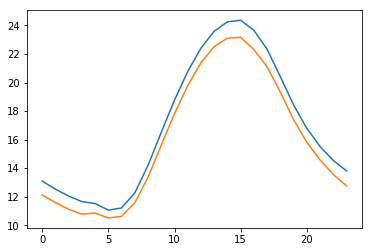

In [38]:
plt.plot(df_train.groupby("hour")['temperature'].mean())
plt.plot(df_test.groupby("hour")['temperature'].mean())

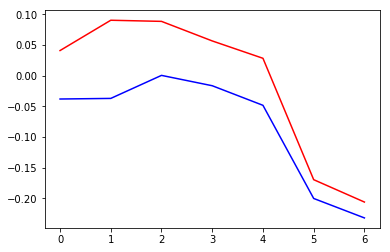

In [39]:
plt.plot(df_train.groupby("day_of_week")['Normalized Demand'].mean(), color='r')
plt.plot(df_test.groupby("day_of_week")['Normalized Demand'].mean(), color='b')